# Drifter Chain RBR Solo Processing

In [1]:
from pathlib import Path
import numpy as np
import rbrmoored
import xarray as xr
import gvpy as gv

%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

The time offset for the RBR Solo has been recorded with a computer set to local time, need to adjust the time drift parameter by 7 hours.

SN 230754 and SN 230757 do not show a download time and thus also no time drift.

---

Set up paths

In [2]:
rbr_data_dir = Path("/Users/gunnar/Projects/nesma/drifter/data/drifter_chain_2024_05/rbrsolo/")
data_raw_dir = rbr_data_dir.joinpath("raw")
files = sorted(data_raw_dir.glob("*.rsk"))

In [3]:
data_proc_dir = rbr_data_dir.joinpath("proc")
fig_dir = rbr_data_dir.joinpath("fig")

Process all files

In [62]:
if False:
    for file in files:
        t = rbrmoored.solo.proc(
            file, data_out=data_proc_dir, figure_out=fig_dir, show_plot=True, offset_time_drift=7
        )

Re-process SN 230757 (initial download was only partial).

In [53]:
file = files[-1]
file

PosixPath('/Users/gunnar/Projects/nesma/drifter/data/drifter_chain_2024_05/rbrsolo/raw/230757_20240529_1215.rsk')

already processed
reading netcdf file from
/Users/gunnar/Projects/nesma/drifter/data/drifter_chain_2024_05/rbrsolo/proc/230757_20240529_1215.nc
time offset more than 4.0 hours, not applied


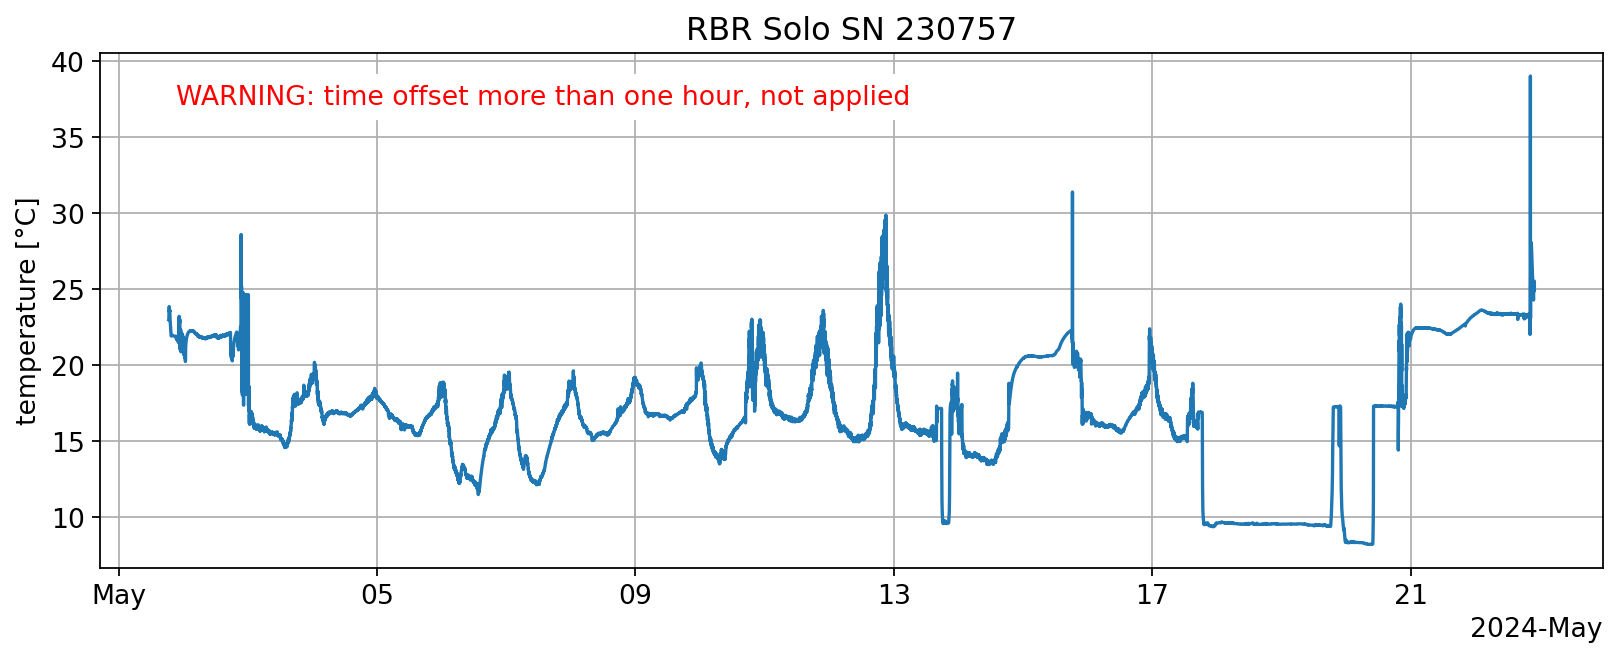

In [54]:
t = rbrmoored.solo.proc(
    file, data_out=data_proc_dir, figure_out=fig_dir, show_plot=True, offset_time_drift=0
)

In [55]:
# manually reading time drift from clock cal (see plot below)
t.attrs["time drift in ms"] = 1.2e3
# correct for time drift
t = rbrmoored.solo.time_offset(t)

applying time offset of 1200.0ms


In [60]:
# save
t.gv.to_netcdf(data_proc_dir.joinpath(file.stem), overwrite=True)

Confirm replacing existing file [Y/n]: y


PosixPath('/Users/gunnar/Projects/nesma/drifter/data/drifter_chain_2024_05/rbrsolo/proc/230757_20240529_1215.nc')

already processed
reading netcdf file from
/Users/gunnar/Projects/nesma/drifter/data/drifter_chain_2024_05/rbrsolo/proc/230757_20240529_1215.nc
time offset has already been applied


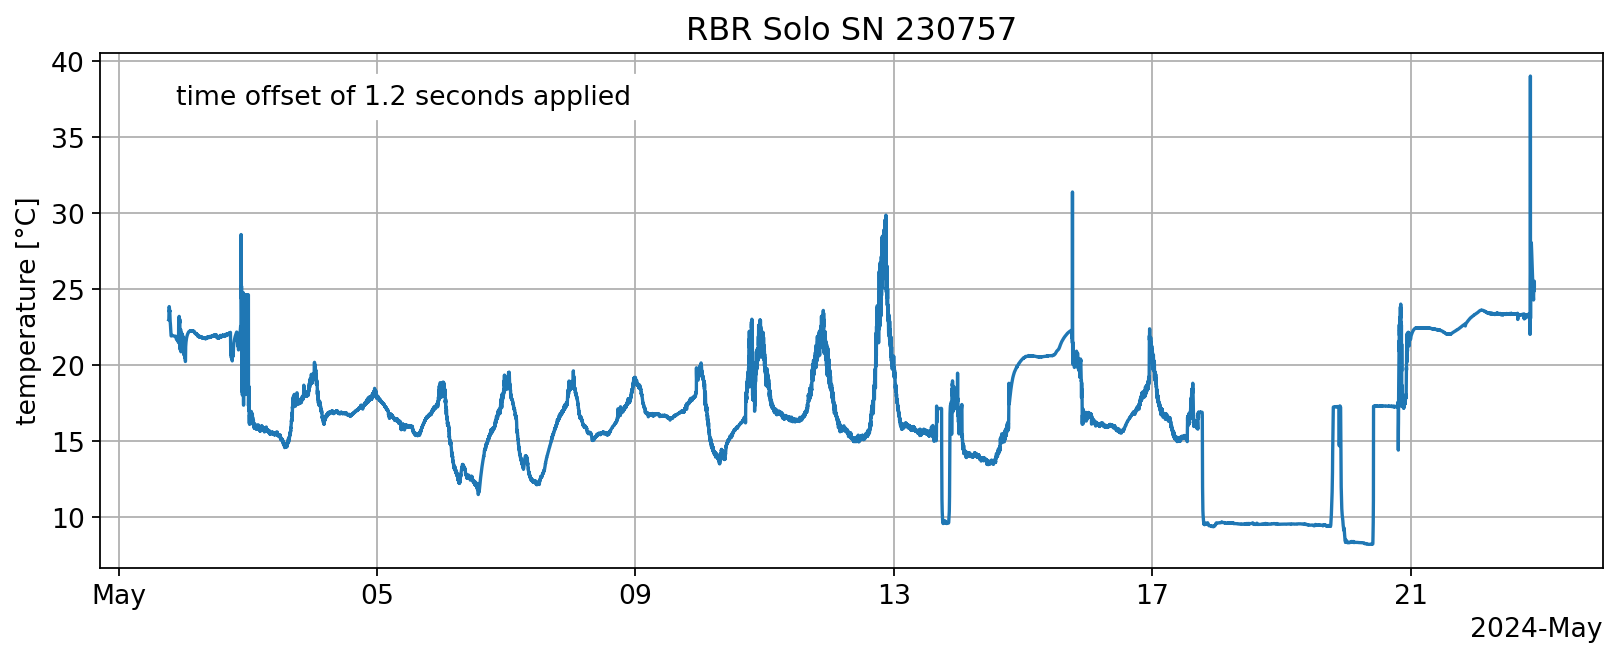

In [61]:
t = rbrmoored.solo.proc(
    file, data_out=data_proc_dir, figure_out=fig_dir, show_plot=True, offset_time_drift=0
)

Adjust time vector SN 230754

In [75]:
file = data_proc_dir.joinpath("230754_20240522_2214.nc")
t = xr.open_dataarray(file)

In [76]:
# manually reading time drift from clock cal (see plot below)
t.attrs["time drift in ms"] = 200
# correct for time drift
t = rbrmoored.solo.time_offset(t)

applying time offset of 200ms


In [77]:
# save
t.gv.to_netcdf(file, overwrite=True)

Confirm replacing existing file [Y/n]: y


PosixPath('/Users/gunnar/Projects/nesma/drifter/data/drifter_chain_2024_05/rbrsolo/proc/230754_20240522_2214.nc')

already processed
reading netcdf file from
/Users/gunnar/Projects/nesma/drifter/data/drifter_chain_2024_05/rbrsolo/proc/230754_20240522_2214.nc
time offset has already been applied


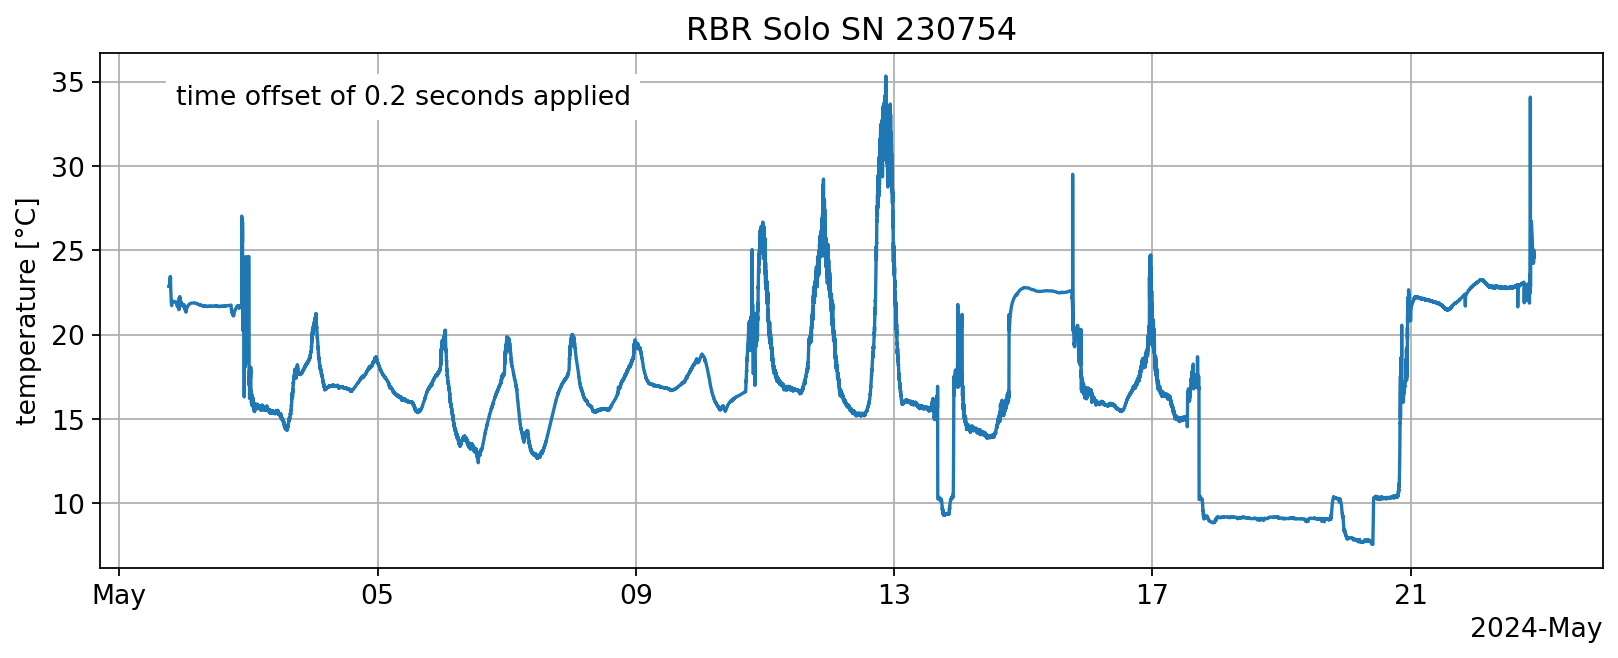

In [78]:
t = rbrmoored.solo.proc(
    data_raw_dir.joinpath("230754_20240522_2214.rsk"), data_out=data_proc_dir, figure_out=fig_dir, show_plot=True, offset_time_drift=0
)

---

Read all files.

In [79]:
files_nc = sorted(data_proc_dir.glob("*.nc"))

In [80]:
allt = [xr.open_dataarray(file) for file in files_nc]

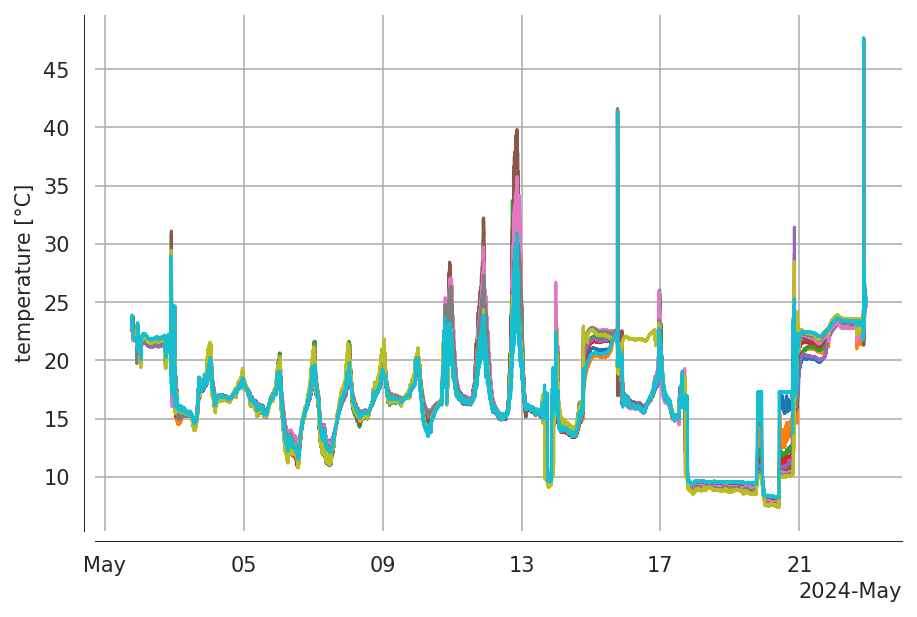

In [81]:
fig, ax = gv.plot.quickfig()
for ti in allt:
    ti.gv.plot(ax=ax)
ax.grid()

In [82]:
ts = slice("2024-05-17", "2024-05-22")
tt = [ti.sel(time=ts) for ti in allt]

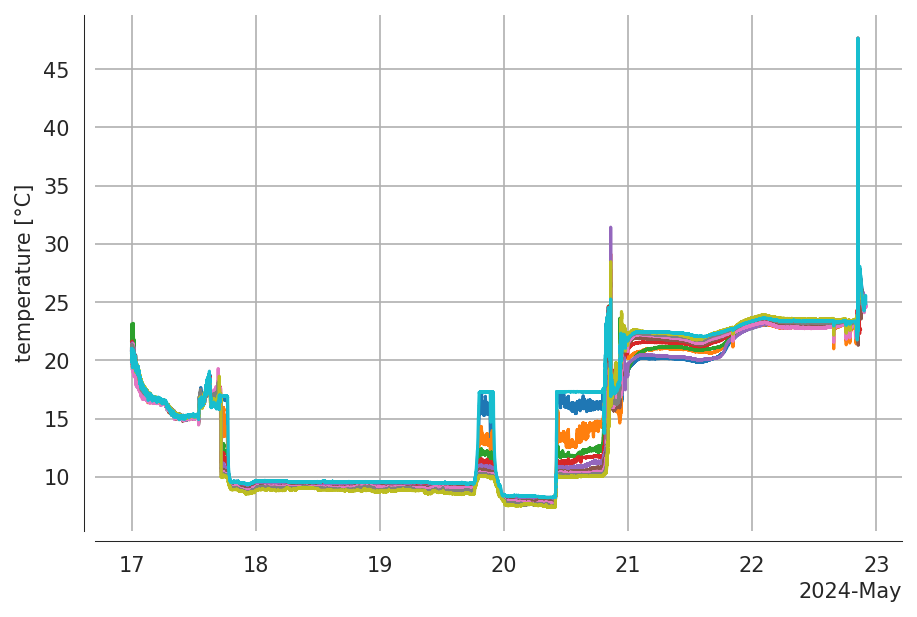

In [83]:
fig, ax = gv.plot.quickfig()
for ti in tt:
    ti.gv.plot(ax=ax)
ax.grid()

Plot clock calibration - everything within 1s. The one outlier may be the one that displayed a funky time offset.

saving to /Users/gunnar/Projects/nesma/drifter/data/drifter_chain_2024_05/rbrsolo/fig/


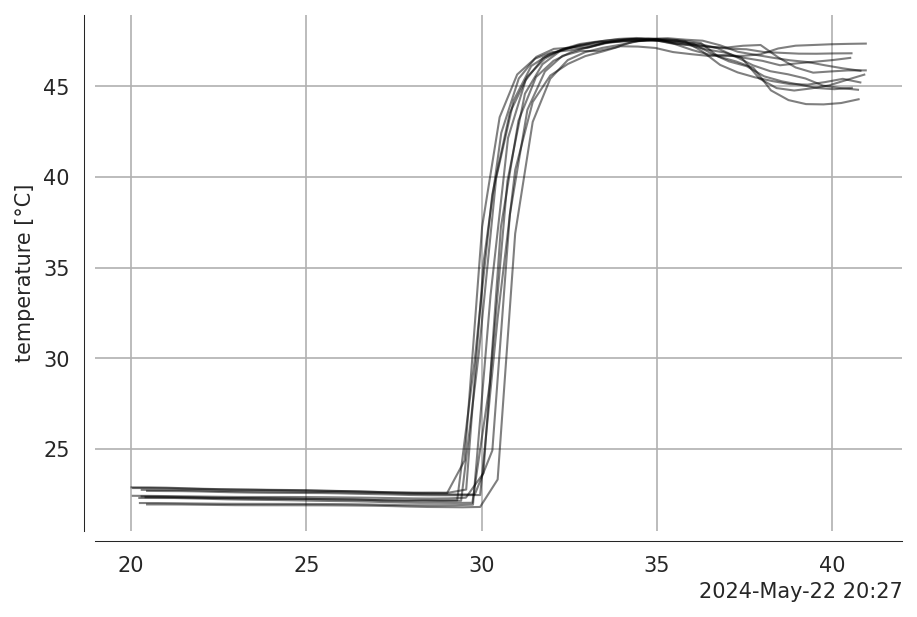

In [84]:
ts_dip = slice("2024-05-22 20:27:20", "2024-05-22 20:27:40")
fig, ax = gv.plot.quickfig()
for ti in tt:
    ti.sel(time=ts_dip).gv.plot(ax=ax, color="k", alpha=0.5, linewidth=1)
ax.grid()
gv.plot.png(
    "/Users/gunnar/Projects/nesma/drifter/data/drifter_chain_2024_05/rbrsolo/fig/clock_verification"
)

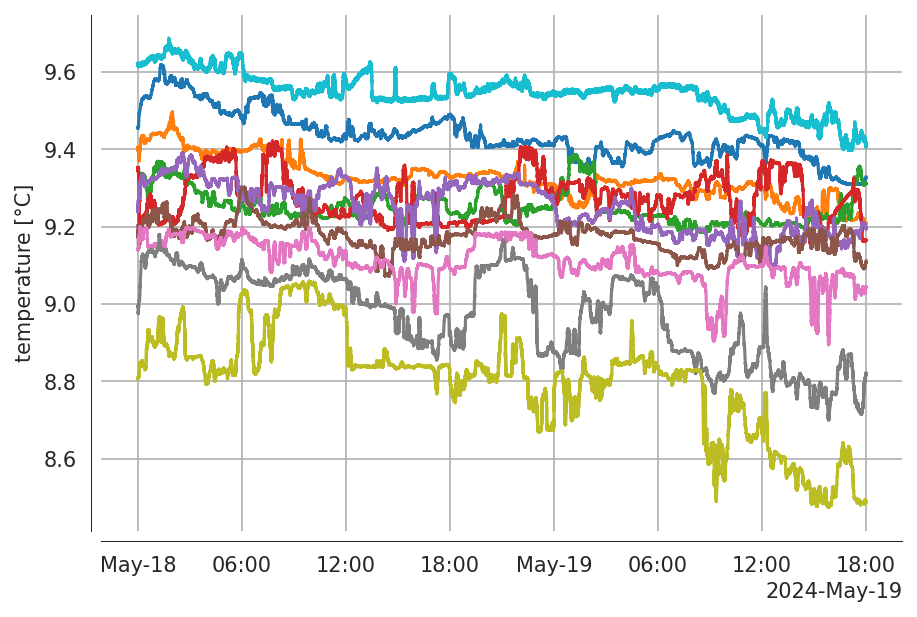

In [16]:
ts_dip = slice("2024-05-18", "2024-05-19 18:00")
fig, ax = gv.plot.quickfig()
for ti in tt:
    ti.sel(time=ts_dip).gv.plot(ax=ax)
ax.grid()